Boston House Price Prediction
=================

In [1]:
import keras

keras.__version__

Using TensorFlow backend.


'2.2.5'

In [4]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape, test_data.shape)
print(train_targets.shape)

(404, 13) (102, 13)
(404,)


In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# train data의 mean, std를 활용하는데 실제 데이터에 이를 그대로 적용하면 성능 하락의 원인이 됨
test_data -= mean
test_data /= std

In [0]:
from keras import models, layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1)) # activation 함수가 없음 -> 출력값이 곧 결과값
  model.compile(optimizer = 'rmsprop', loss='mse', metrics=['mae'])  
  return model

In [15]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # 모델 학습
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
             epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [16]:
all_scores

[2.3453728715972146, 2.4204099744853407, 2.793123622932056, 2.5693847188855163]

In [17]:
np.mean(all_scores)

2.5320727969750316

IMDB Classification
===========

In [18]:
import keras
import numpy as np 
keras.__version__

'2.2.5'

In [20]:
!pip install numpy==1.16.1

     |████████████████████████████████| 17.3MB 2.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5


In [19]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  print(results.shape)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.  
  return results

In [24]:
train_data[0][0]

1

In [25]:
# 훈련 데이터, 테스트 데이터를 벡터로 변환한다
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [0]:
# 레이블을 벡터로 바꾼다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
# data split
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [32]:
# vector to word
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [33]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
# Build model
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류기에서는 0과 1 사이의 값을 가지는 sigmoid 사용
# 다중 분류기에서는 softmax 사용(MNIST)

In [35]:
# model compile
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [36]:
history = model.fit(partial_x_train,
                   partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val)
                   )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 232us/step - loss: 0.5137 - acc: 0.7807 - val_loss: 0.3915 - val_acc: 0.8657
Epoch 2/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.3081 - acc: 0.9042 - val_loss: 0.3054 - val_acc: 0.8878
Epoch 3/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.2246 - acc: 0.9281 - val_loss: 0.2779 - val_acc: 0.8904
Epoch 4/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1769 - acc: 0.9427 - val_loss: 0.2753 - val_acc: 0.8901
Epoch 5/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1435 - acc: 0.9535 - val_loss: 0.2869 - val_acc: 0.8857
Epoch 6/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1190 - acc: 0.9638 - val_loss: 0.3058 - val_acc: 0.8821
Epoch 7/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.0995 - acc: 0.9707 - val_loss: 0.3080 - 

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

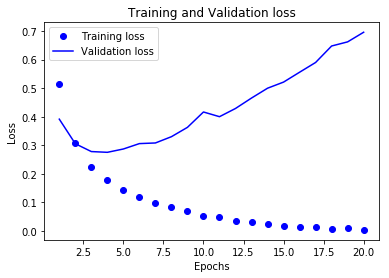

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# overfit된 것을 확인할 수 있음
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

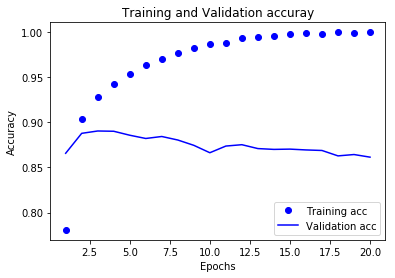

In [42]:
plt.clf() # 그래프를 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuray')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
result = model.predict(x_test)

In [44]:
result.shape

(25000, 1)

In [45]:
result

array([[1.7507374e-03],
       [9.9999988e-01],
       [9.7033679e-01],
       ...,
       [5.1492453e-04],
       [3.5730600e-03],
       [7.5961304e-01]], dtype=float32)

In [46]:
print(x_test[1])
print(result[1]) # 매우 긍정!!!!

[0. 1. 1. ... 0. 0. 0.]
[0.9999999]


In [47]:
# thresholding -> 부정인지 긍정인지 분류함
# 처음부터 확률값 없이 이진분류하고 싶으면 최종 뉴런의 갯수를 2개로 하고 
# softmax로 activation시켜주면 된다. 
for i in range(len(result)):
  if result[i] > 0.5:
    result[i] = 1
  else:
    result[i] = 0
    
result

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)